In [1]:
import sys
import warnings
from pathlib import Path
from typing import Sequence, Union
import os
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import date, time, datetime
import time

In [2]:
warnings.filterwarnings('ignore')

## Загрузка данных и проверка дубликатов

In [3]:
data_hits = pd.read_csv('data/ga_hits-002.csv')
data_sessions = pd.read_csv('data/ga_sessions.csv')

In [4]:
data_hits.head()

,session_id,hit_date,hit_time,hit_number,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value
0,5639623078712724064.1640254056.1640254056,2021-12-23,597864.0,30,event,NaN,sberauto.com/cars?utm_source_initial=google&ut...,quiz,quiz_show,NaN,NaN
1,7750352294969115059.1640271109.1640271109,2021-12-23,597331.0,41,event,NaN,sberauto.com/cars/fiat?city=1&city=18&rental_c...,quiz,quiz_show,NaN,NaN
2,885342191847998240.1640235807.1640235807,2021-12-23,796252.0,49,event,NaN,sberauto.com/cars/all/volkswagen/polo/e994838f...,quiz,quiz_show,NaN,NaN
3,142526202120934167.1640211014.1640211014,2021-12-23,934292.0,46,event,NaN,sberauto.com/cars?utm_source_initial=yandex&ut...,quiz,quiz_show,NaN,NaN
4,3450086108837475701.1640265078.1640265078,2021-12-23,768741.0,79,event,NaN,sberauto.com/cars/all/mercedes-benz/cla-klasse...,quiz,quiz_show,NaN,NaN


In [5]:
data_hits.shape

(15726470, 11)

In [6]:
data_hits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15726470 entries, 0 to 15726469
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   session_id      object 
 1   hit_date        object 
 2   hit_time        float64
 3   hit_number      int64  
 4   hit_type        object 
 5   hit_referer     object 
 6   hit_page_path   object 
 7   event_category  object 
 8   event_action    object 
 9   event_label     object 
 10  event_value     float64
dtypes: float64(2), int64(1), object(8)
memory usage: 1.3+ GB


In [7]:
data_sessions.head()

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,device_category,device_os,device_brand,device_model,device_screen_resolution,device_browser,geo_country,geo_city
0,9055434745589932991.1637753792.1637753792,2108382700.163775,2021-11-24,14:36:32,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Zlatoust
1,905544597018549464.1636867290.1636867290,210838531.163687,2021-11-14,08:21:30,1,MvfHsxITijuriZxsqZqt,cpm,FTjNLDyTrXaWYgZymFkV,xhoenQgDQsgfEPYNPwKO,IGUCNvHlhfHpROGclCit,mobile,Android,Samsung,NaN,385x854,Samsung Internet,Russia,Moscow
2,9055446045651783499.1640648526.1640648526,2108385331.164065,2021-12-28,02:42:06,1,ZpYIoDJMcFzVoPFsHGJL,banner,LEoPHuyFvzoNfnzGgfcd,vCIpmpaGBnIQhyYNkXqp,puhZPIYqKXeFPaUviSjo,mobile,Android,Huawei,NaN,360x720,Chrome,Russia,Krasnoyarsk
3,9055447046360770272.1622255328.1622255328,2108385564.162225,2021-05-29,05:00:00,1,kjsLglQLzykiRbcDiGcD,cpc,NaN,NOBKLgtuvqYWkXQHeYWM,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow
4,9055447046360770272.1622255345.1622255345,2108385564.162225,2021-05-29,05:00:00,2,kjsLglQLzykiRbcDiGcD,cpc,NaN,NaN,NaN,mobile,NaN,Xiaomi,NaN,393x786,Chrome,Russia,Moscow


In [8]:
data_sessions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1860042 entries, 0 to 1860041
Data columns (total 18 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   session_id                object
 1   client_id                 object
 2   visit_date                object
 3   visit_time                object
 4   visit_number              int64 
 5   utm_source                object
 6   utm_medium                object
 7   utm_campaign              object
 8   utm_adcontent             object
 9   utm_keyword               object
 10  device_category           object
 11  device_os                 object
 12  device_brand              object
 13  device_model              object
 14  device_screen_resolution  object
 15  device_browser            object
 16  geo_country               object
 17  geo_city                  object
dtypes: int64(1), object(17)
memory usage: 255.4+ MB


In [9]:
data_sessions.shape

(1860042, 18)

In [10]:
print(f'Дубликаты data_hits: {data_hits.duplicated().sum()}')
print(f'Дубликаты data_sessions: {data_sessions.duplicated().sum()}')

Дубликаты data_hits: 0
Дубликаты data_sessions: 0


## Смотрим на data_hits

In [11]:
len(data_hits['event_action'].unique())

230

In [12]:
## оставим только целевые действия
target_events = ['sub_car_claim_click', 'sub_car_claim_submit_click',
 'sub_open_dialog_click', 'sub_custom_question_submit_click',
 'sub_call_number_click', 'sub_callback_submit_click',
 'sub_submit_success', 'sub_car_request_submit_click']

target_hits = data_hits.loc[data_hits['event_action'].isin(target_events)]

In [13]:
data_hits.columns

Index(['session_id', 'hit_date', 'hit_time', 'hit_number', 'hit_type',
       'hit_referer', 'hit_page_path', 'event_category', 'event_action',
       'event_label', 'event_value'],
      dtype='object')

In [14]:
## посмотрим топ самых популярных событий
target_hits.event_action.value_counts().head(10)

event_action
sub_car_claim_click                 37928
sub_open_dialog_click               25870
sub_submit_success                  18439
sub_car_claim_submit_click          12359
sub_call_number_click                3653
sub_callback_submit_click            3074
sub_car_request_submit_click         2966
sub_custom_question_submit_click      619
Name: count, dtype: int64

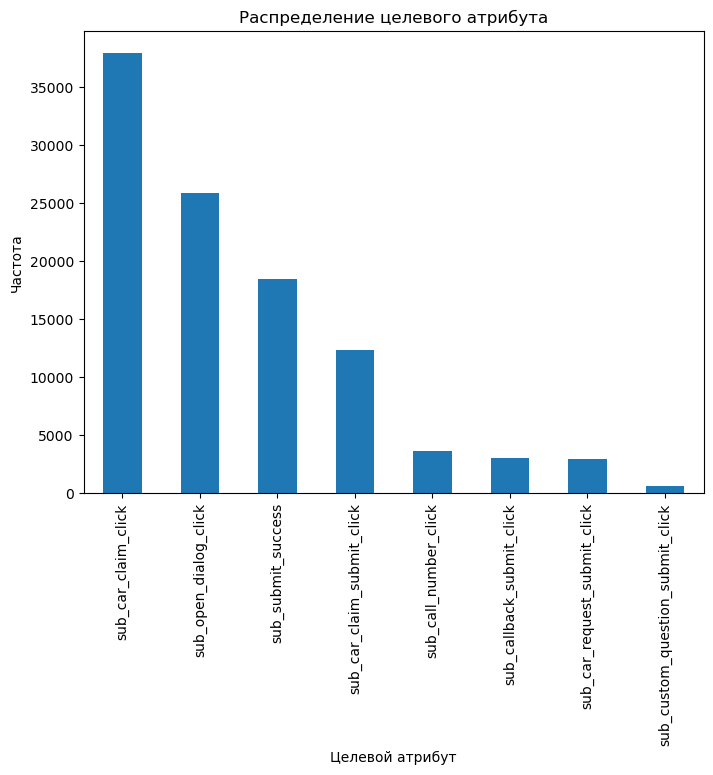

In [15]:
plt.figure(figsize=(8, 6))
target_hits['event_action'].value_counts().plot(kind='bar')
plt.title('Распределение целевого атрибута')
plt.xlabel('Целевой атрибут')
plt.ylabel('Частота')
plt.show()

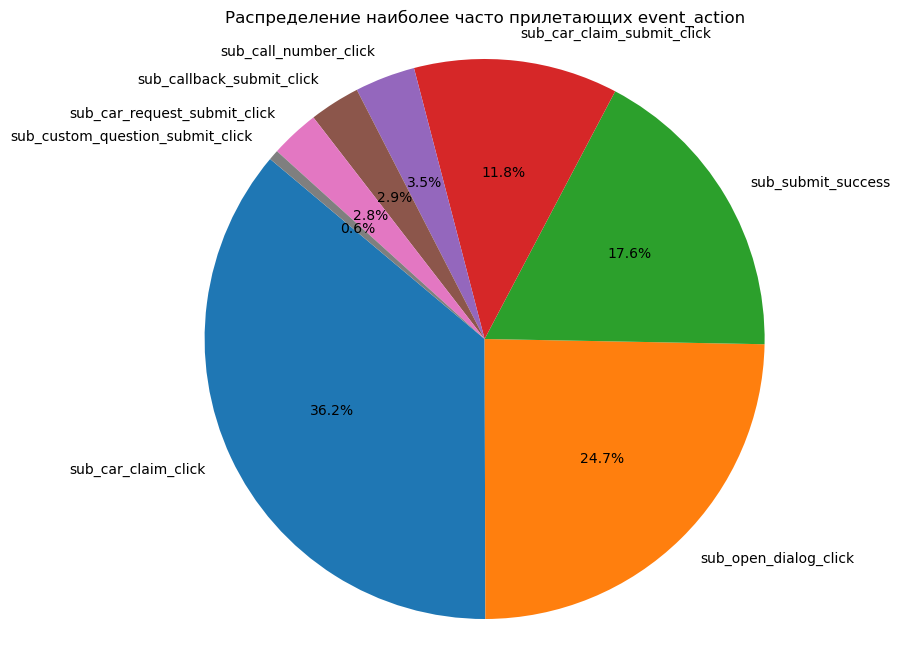

In [16]:
event_action_counts = target_hits['event_action'].value_counts()

plt.figure(figsize=(10, 8))
plt.pie(event_action_counts, labels=event_action_counts.index, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Распределение наиболее часто прилетающих event_action')
plt.show()

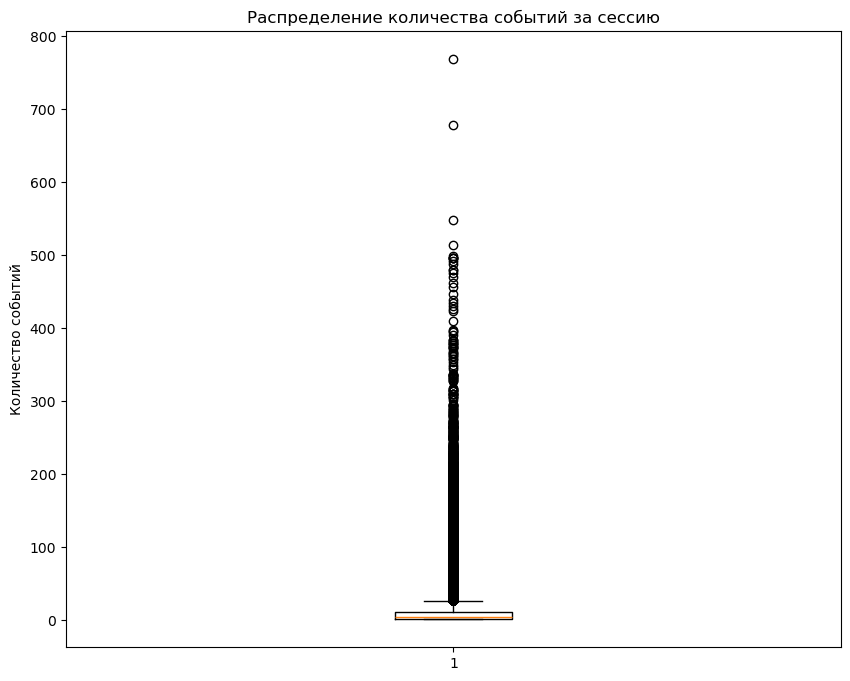

In [17]:
session_event_counts = data_hits.groupby('session_id')['event_action'].count()

plt.figure(figsize=(10, 8))
plt.boxplot(session_event_counts)
plt.title('Распределение количества событий за сессию')
plt.ylabel('Количество событий')
plt.show()

In [18]:
total_events = len(data_hits)
target_events = len(target_hits)
percentage_target_events = (target_events / total_events) * 100

print(f"Процент целевых событий от общего количества: {percentage_target_events:.2f}%")

Процент целевых событий от общего количества: 0.67%


In [19]:
data_hits.event_action.value_counts().head(10)

event_action
view_card                  3558985
view_new_card              3551009
sub_landing                1798117
go_to_car_card              973666
sub_view_cars_click         791515
search_form_region          512069
search_form_search_btn      433748
sap_search_form_cost_to     356596
showed_number_ads           326274
pagination_click            248944
Name: count, dtype: int64

In [20]:
pd.to_datetime(data_hits['hit_time'])

0          1970-01-01 00:00:00.000597864
1          1970-01-01 00:00:00.000597331
2          1970-01-01 00:00:00.000796252
3          1970-01-01 00:00:00.000934292
4          1970-01-01 00:00:00.000768741
                        ...             
15726465   1970-01-01 00:00:00.000810589
15726466   1970-01-01 00:00:00.000904927
15726467   1970-01-01 00:00:00.002172865
15726468   1970-01-01 00:00:00.000713325
15726469   1970-01-01 00:00:00.000742820
Name: hit_time, Length: 15726470, dtype: datetime64[ns]

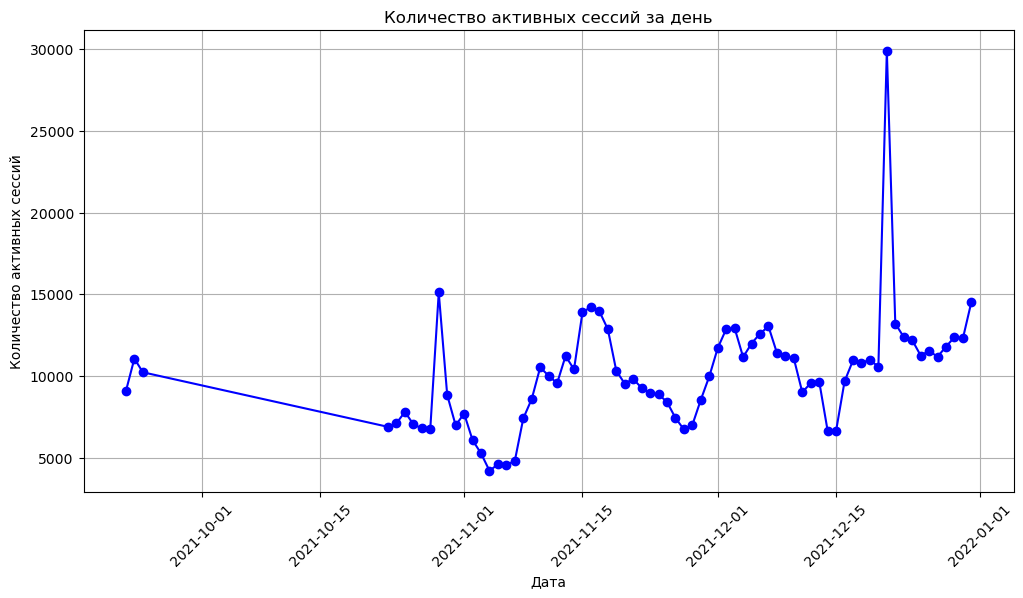

In [21]:
data_hits['hit_time'] = pd.to_timedelta(data_hits['hit_time'])
data_hits['hit_datetime'] = pd.to_datetime(data_hits['hit_date']) + data_hits['hit_time']
data_hits['date'] = data_hits['hit_datetime'].dt.date
active_sessions_per_day = data_hits.groupby('date')['session_id'].nunique()

plt.figure(figsize=(12, 6))
plt.plot(active_sessions_per_day.index, active_sessions_per_day.values, marker='o', color='b')
plt.title('Количество активных сессий за день')
plt.xlabel('Дата')
plt.ylabel('Количество активных сессий')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [22]:
print(pd.to_datetime(data_hits['hit_date']).min(), pd.to_datetime(data_hits['hit_date']).max())

2021-05-19 00:00:00 2021-12-31 00:00:00


In [23]:
numerical_cols = target_hits.select_dtypes(include=['int', 'float']).columns
corr = target_hits[numerical_cols].corr()
corr

,hit_time,hit_number,event_value
hit_time,1.000000,0.641646,NaN
hit_number,0.641646,1.000000,NaN
event_value,NaN,NaN,NaN


In [24]:
data_hits.columns

Index(['session_id', 'hit_date', 'hit_time', 'hit_number', 'hit_type',
       'hit_referer', 'hit_page_path', 'event_category', 'event_action',
       'event_label', 'event_value', 'hit_datetime', 'date'],
      dtype='object')

In [25]:
del target_hits
del corr
del numerical_cols
del active_sessions_per_day
del session_event_counts
del event_action_counts
del data_hits

In [26]:
plt.close('all')

В целом, видно, что на сайте довольно много пользователей, но они мало совершают целевые действия. Процент целевых событий от общего количества: 0.67%  
Больше всего событий, касающихся просмотра сайта, это может означать, что в целом сайт интересует пользователей, но что-то ломает воронку и препятствует совершению целевых действий  
Особой корреляции между параметрами в датасете нет

## Смотрим data_sessions

In [27]:
print("Процент пропущенных значений по каждому столбцу:")
print(data_sessions.isnull().mean() * 100)

Процент пропущенных значений по каждому столбцу:
session_id                   0.000000
client_id                    0.000000
visit_date                   0.000000
visit_time                   0.000000
visit_number                 0.000000
utm_source                   0.005215
utm_medium                   0.000000
utm_campaign                11.806346
utm_adcontent               18.043410
utm_keyword                 58.174009
device_category              0.000000
device_os                   57.533002
device_brand                19.740307
device_model                99.121633
device_screen_resolution     0.000000
device_browser               0.000000
geo_country                  0.000000
geo_city                     0.000000
dtype: float64


In [28]:
data_sessions['visit_date'] = pd.to_datetime(data_sessions['visit_date'])
data_sessions['visit_time'] = pd.to_datetime(data_sessions['visit_time'])

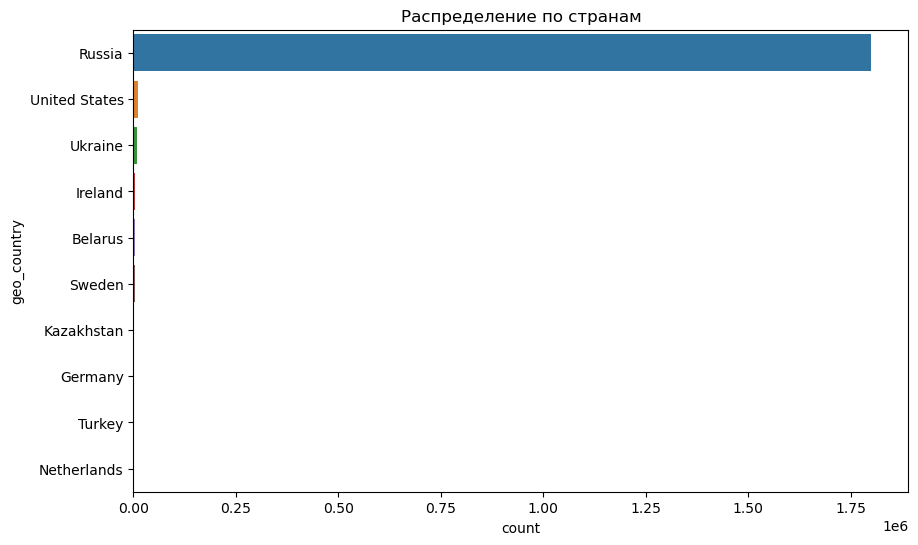

In [29]:
plt.figure(figsize=(10, 6))
sns.countplot(y='geo_country', data=data_sessions, order=data_sessions['geo_country'].value_counts().head(10).index)
plt.title('Распределение по странам')
plt.show()

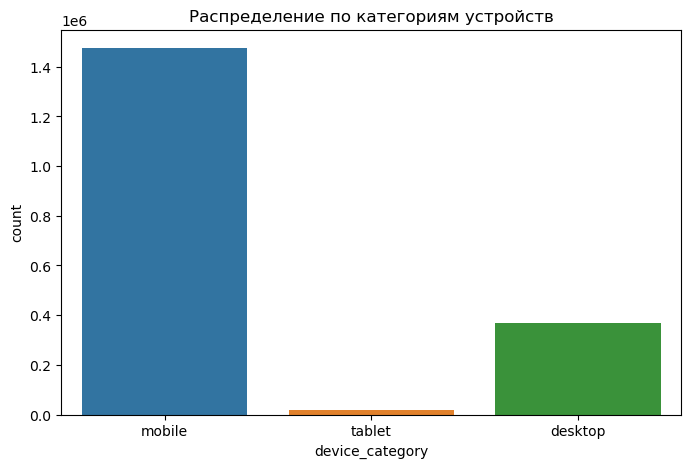

In [30]:
plt.figure(figsize=(8, 5))
sns.countplot(x='device_category', data=data_sessions)
plt.title('Распределение по категориям устройств')
plt.show()

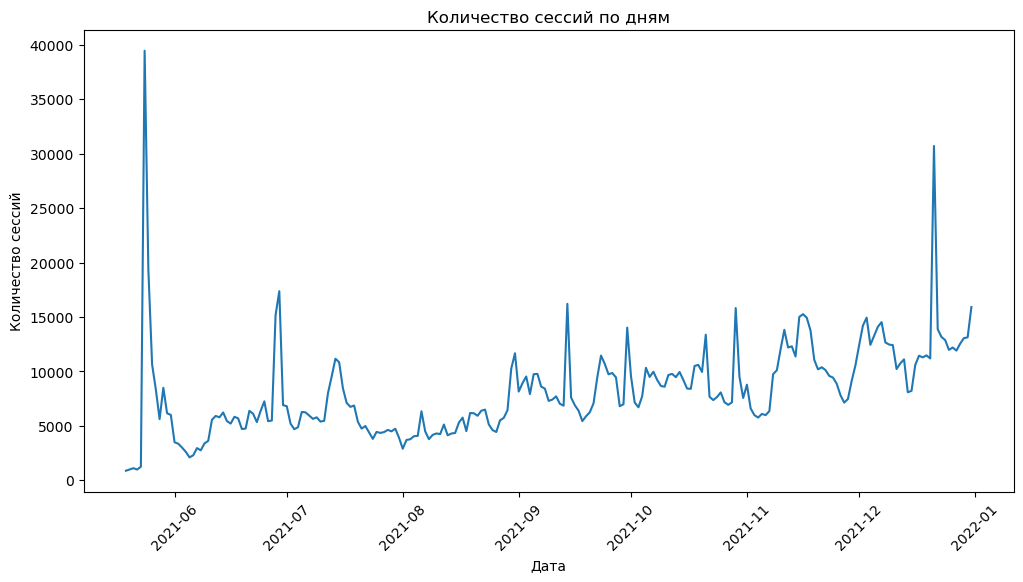

In [31]:
sessions_per_day = data_sessions.groupby('visit_date').size().reset_index(name='session_count')

plt.figure(figsize=(12, 6))
sns.lineplot(x='visit_date', y='session_count', data=sessions_per_day)
plt.title('Количество сессий по дням')
plt.xlabel('Дата')
plt.ylabel('Количество сессий')
plt.xticks(rotation=45)
plt.show()

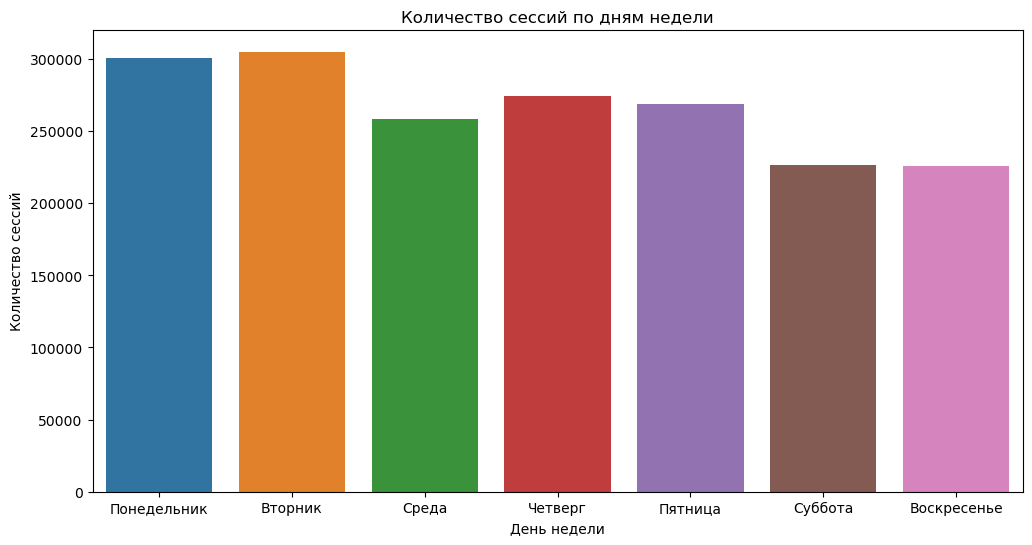

In [32]:
data_sessions['day_of_week'] = data_sessions['visit_date'].dt.dayofweek
sessions_per_day_of_week = data_sessions.groupby('day_of_week').size().reset_index(name='session_count')
days_of_week = ['Понедельник', 'Вторник', 'Среда', 'Четверг', 'Пятница', 'Суббота', 'Воскресенье']

plt.figure(figsize=(12, 6))
sns.barplot(x='day_of_week', y='session_count', data=sessions_per_day_of_week)
plt.title('Количество сессий по дням недели')
plt.xlabel('День недели')
plt.ylabel('Количество сессий')
plt.xticks(ticks=range(7), labels=days_of_week)
plt.show()

In [33]:
data_sessions.columns

Index(['session_id', 'client_id', 'visit_date', 'visit_time', 'visit_number',
       'utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
       'utm_keyword', 'device_category', 'device_os', 'device_brand',
       'device_model', 'device_screen_resolution', 'device_browser',
       'geo_country', 'geo_city', 'day_of_week'],
      dtype='object')

In [34]:
del sessions_per_day
del sessions_per_day_of_week
del days_of_week
del data_sessions

In [35]:
plt.close('all')

## Начнем анализировать смешанные данные 

Так как данные очень большие, чтобы не умирала оперативная память будем использовать dask

In [36]:
import dask.dataframe as dd 

data_sessions = dd.read_csv('data/ga_sessions.csv', dtype={'client_id': 'object', 'device_model': 'object'})
data_hits = dd.read_csv('data/ga_hits-002.csv', dtype={'client_id': 'object', 
                                                       'device_model': 'object', 
                                                       'event_label': 'object'})
merged_data = dd.merge(data_sessions, data_hits, on='session_id', how='inner')

merged_data = merged_data.compute()

In [37]:
del data_sessions
del data_hits

## Поработаем немного с utm метками

Создадим признаки, что человек пришел из соц сетей и из органикии

In [38]:
social_media_utms = ['QxAxdyPLuQMEcrdZWdWb', 'MvfHsxITijuriZxsqZqt',
                     'ISrKoXQCxqqYvAZICvjs', 'IZEXUFLARCUMynmHNBGo',
                     'PlbkrSYoHuZBWfYjYnfw', 'gVRrcxiDQubJiljoTbGm']

target_events = ['sub_car_claim_click', 'sub_car_claim_submit_click',
 'sub_open_dialog_click', 'sub_custom_question_submit_click',
 'sub_call_number_click', 'sub_callback_submit_click',
 'sub_submit_success', 'sub_car_request_submit_click']

organic_utms_medium = ['organic', 'referral', '(none)']

In [39]:
merged_data['from_social'] =  merged_data['utm_source'].isin(social_media_utms)

In [40]:
merged_data['is_target'] = merged_data['event_action'].isin(target_events)

In [41]:
merged_data['is_target'] = merged_data['is_target'].astype(int)
merged_data['from_social'] = merged_data['from_social'].astype(int)

Ну и посмотрим еще пару графиков

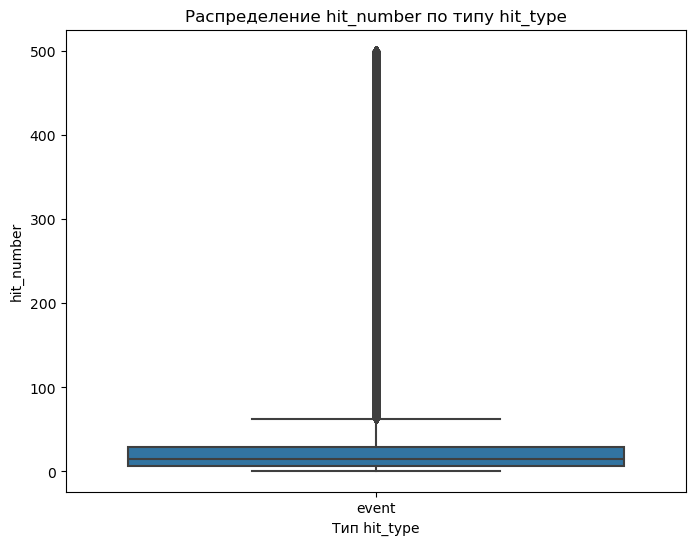

In [42]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='hit_type', y='hit_number', data=merged_data)
plt.title('Распределение hit_number по типу hit_type')
plt.xlabel('Тип hit_type')
plt.ylabel('hit_number')
plt.show()

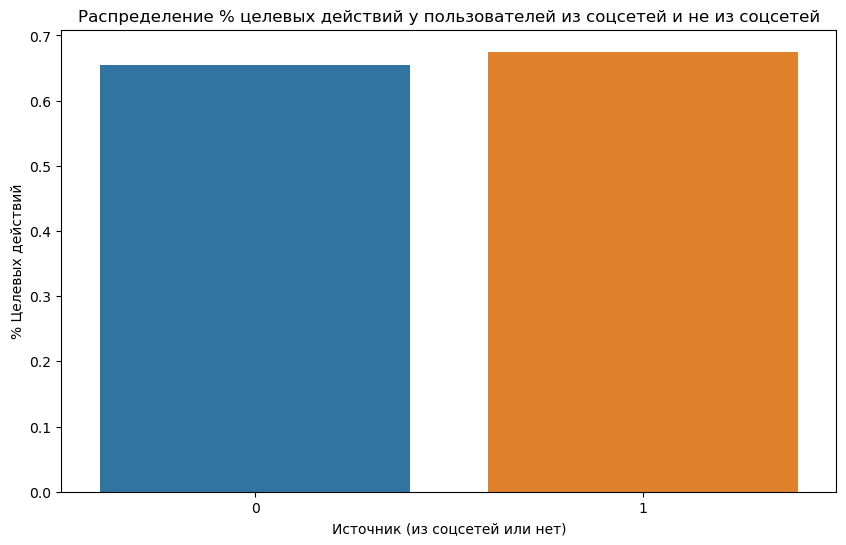

In [43]:
plt.figure(figsize=(10, 6))
agg_data = merged_data.groupby('from_social')['is_target'].mean() * 100
sns.barplot(x=agg_data.index, y=agg_data.values)
plt.title('Распределение % целевых действий у пользователей из соцсетей и не из соцсетей')
plt.xlabel('Источник (из соцсетей или нет)')
plt.ylabel('% Целевых действий')
plt.show()

In [44]:
merged_data['is_organic'] = merged_data['utm_medium'].isin(organic_utms_medium)
merged_data['is_organic'] = merged_data['is_organic'].astype(int)

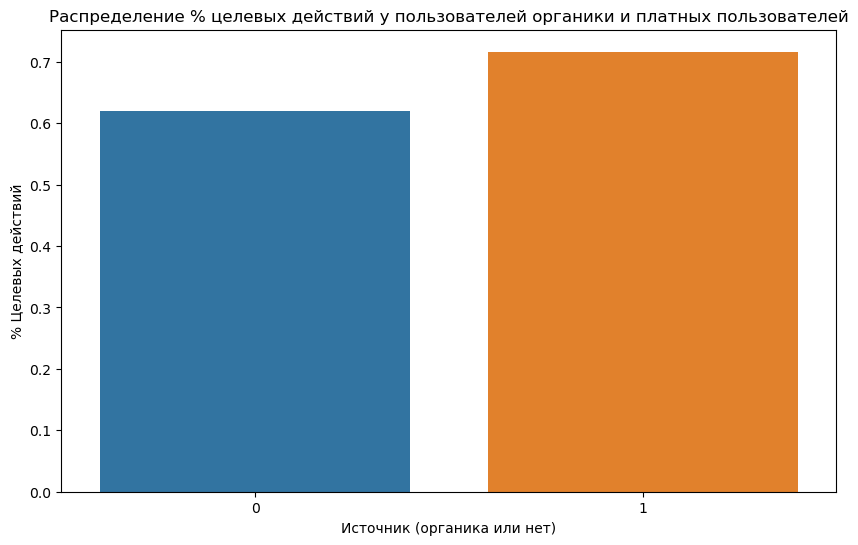

In [45]:
plt.figure(figsize=(10, 6))
agg_data = merged_data.groupby('is_organic')['is_target'].mean() * 100
sns.barplot(x=agg_data.index, y=agg_data.values)
plt.title('Распределение % целевых действий у пользователей органики и платных пользователей')
plt.xlabel('Источник (органика или нет)')
plt.ylabel('% Целевых действий')
plt.show()

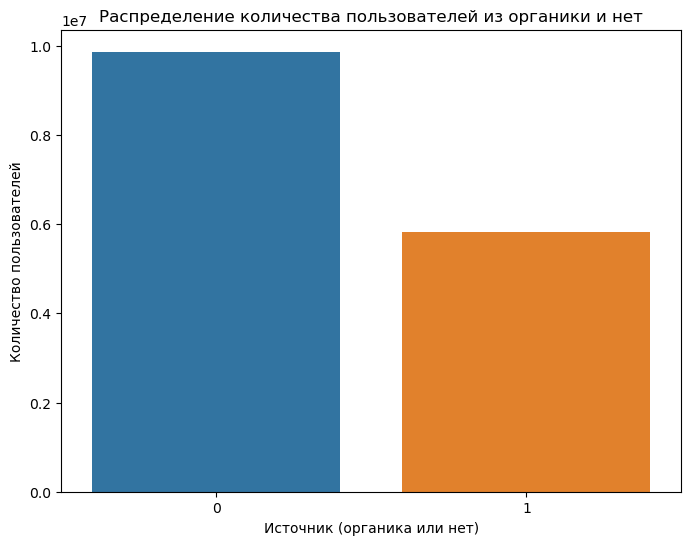

In [46]:
plt.figure(figsize=(8, 6))
sns.countplot(x='is_organic', data=merged_data)
plt.title('Распределение количества пользователей из органики и нет')
plt.xlabel('Источник (органика или нет)')
plt.ylabel('Количество пользователей')
plt.show()

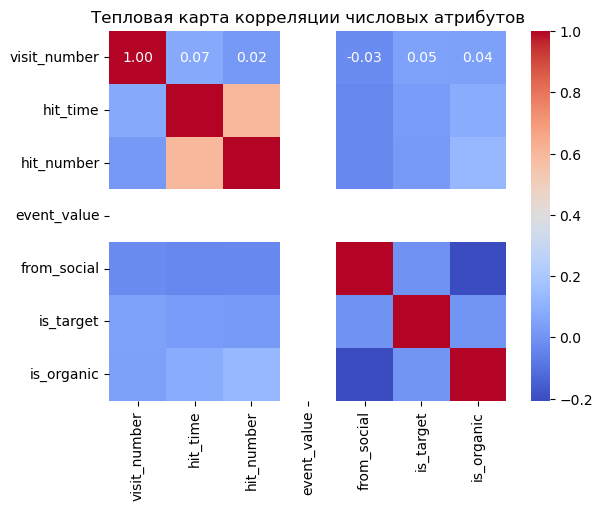

In [47]:
numerical_cols = merged_data.select_dtypes(include=['int', 'float']).columns
corr = merged_data[numerical_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции числовых атрибутов')
plt.show()

In [48]:
total_sessions = merged_data['session_id'].nunique()
percentage_target_sessions = (merged_data.loc[merged_data['is_target'] == 1, 'session_id'].nunique() / total_sessions) * 100

print(f'Процент сессий, завершившихся целевым действием: {percentage_target_sessions:.2f}%')

Процент сессий, завершившихся целевым действием: 2.90%


In [49]:
del corr

## Выводы EDA

У нас довольно много данных, так как на сайте много пользователь, но всего лишь 2.90% сессий завершились целевым действием, можно учесть это при сплитовании выборок, чтобы улучшить качество модели (но мы так делать пока не будем 😊)

Инсайты, которые удалось обнаружить на этапе EDA:
- Чем чаще пользователь посещает сайт, тем скорее он совершит целевое действие
- Пользователи с органического трафика чаще совершают целевые действия
- В первой половине недели чаще происходят целевые действия
- Пользователи, пришедшие из социальных сетей, реже совершают целевые действия

## Подготовка данных к обучению

In [50]:
merged_data.head(5)

,session_id,client_id,visit_date,visit_time,visit_number,utm_source,utm_medium,utm_campaign,utm_adcontent,utm_keyword,...,hit_type,hit_referer,hit_page_path,event_category,event_action,event_label,event_value,from_social,is_target,is_organic
0,767341087831575132.1640188508.1640188508,178660519.1640188508,2021-12-22,18:55:08,1,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,puhZPIYqKXeFPaUviSjo,...,event,<NA>,podpiska.sberauto.com/,sub_page_view,sub_landing,<NA>,NaN,0,0,1
1,7673422167902281677.1634492368.1634492368,1786607822.1634492365,2021-10-17,20:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,<NA>,...,event,HbolMJUevblAbkHClEQa,podpiska.sberauto.com/,sub_page_view,sub_landing,KclpemfoHstknWHFiLit,NaN,0,0,0
2,7673422167902281677.1634492368.1634492368,1786607822.1634492365,2021-10-17,20:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,<NA>,...,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,card_web,view_card,KclpemfoHstknWHFiLit,NaN,0,0,0
3,7673422167902281677.1634492368.1634492368,1786607822.1634492365,2021-10-17,20:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,<NA>,...,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,card_web,view_new_card,KclpemfoHstknWHFiLit,NaN,0,0,0
4,7673422167902281677.1634492368.1634492368,1786607822.1634492365,2021-10-17,20:00:00,1,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,<NA>,...,event,HbolMJUevblAbkHClEQa,sberauto.com/cars/all/toyota/alphard/2ebe4871?...,card_web,view_new_card,KclpemfoHstknWHFiLit,NaN,0,0,0


In [51]:
merged_data.drop(['event_value', 'device_model', 'utm_keyword', 'device_os', 'hit_time', 
            'hit_referer', 'session_id', 'client_id', 'hit_date', 'hit_type', 
            'visit_number', 'visit_date', 'visit_time', 'hit_number', 
            'hit_page_path', 'event_category', 'event_label'], axis=1, inplace=True)

In [52]:
merged_data = merged_data.drop_duplicates()

In [53]:
merged_data.drop(['event_action'], axis=1, inplace=True)

In [54]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1905490 entries, 0 to 240313
Data columns (total 13 columns):
 #   Column                    Dtype 
---  ------                    ----- 
 0   utm_source                string
 1   utm_medium                string
 2   utm_campaign              string
 3   utm_adcontent             string
 4   device_category           string
 5   device_brand              string
 6   device_screen_resolution  string
 7   device_browser            string
 8   geo_country               string
 9   geo_city                  string
 10  from_social               int64 
 11  is_target                 int64 
 12  is_organic                int64 
dtypes: int64(3), string(10)
memory usage: 317.5 MB


In [55]:
merged_data.to_csv('data/ready_to_learn.csv')

# Обучение модели

In [56]:
from catboost import CatBoostClassifier
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import train_test_split
import pickle
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
import pandas as pd
import joblib
import numpy as np

In [57]:
merged_data = pd.read_csv('data/ready_to_learn.csv', low_memory = False)

In [58]:
merged_data.columns

Index(['Unnamed: 0', 'utm_source', 'utm_medium', 'utm_campaign',
       'utm_adcontent', 'device_category', 'device_brand',
       'device_screen_resolution', 'device_browser', 'geo_country', 'geo_city',
       'from_social', 'is_target', 'is_organic'],
      dtype='object')

In [59]:
categorical_features = ['utm_source', 'utm_medium', 'utm_campaign', 'utm_adcontent',
                        'device_category', 'device_brand', 'device_screen_resolution',
                        'device_browser', 'geo_country', 'geo_city', 'from_social',
                        'is_organic']
 
for feature in categorical_features: 
    d = {v:i for i,v in enumerate(merged_data[feature].astype('category').cat.categories)} 
    with open(f'encode/{feature}_encoder.pickle', 'wb') as f: 
        pickle.dump(d, f)

encoded_data = merged_data[categorical_features]

In [60]:
for feature in categorical_features:
    encoded_data[feature] = encoded_data[feature].astype("category").cat.codes

In [61]:
X = encoded_data
y = merged_data['is_target']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42, stratify=y.values
)

In [62]:
model = CatBoostClassifier(
    iterations = 1000,
    learning_rate = 0.1,
    l2_leaf_reg = 0.2,
    auto_class_weights = 'Balanced'
)

model.fit(
    X = X_train,
    y = y_train
)

0:	learn: 0.6903604	total: 153ms	remaining: 2m 32s
1:	learn: 0.6878282	total: 215ms	remaining: 1m 47s
2:	learn: 0.6853781	total: 273ms	remaining: 1m 30s
3:	learn: 0.6832901	total: 337ms	remaining: 1m 23s
4:	learn: 0.6818012	total: 406ms	remaining: 1m 20s
5:	learn: 0.6805289	total: 514ms	remaining: 1m 25s
6:	learn: 0.6789947	total: 578ms	remaining: 1m 21s
7:	learn: 0.6775691	total: 658ms	remaining: 1m 21s
8:	learn: 0.6764756	total: 728ms	remaining: 1m 20s
9:	learn: 0.6754162	total: 794ms	remaining: 1m 18s
10:	learn: 0.6744936	total: 858ms	remaining: 1m 17s
11:	learn: 0.6737833	total: 924ms	remaining: 1m 16s
12:	learn: 0.6730629	total: 995ms	remaining: 1m 15s
13:	learn: 0.6721573	total: 1.05s	remaining: 1m 14s
14:	learn: 0.6709400	total: 1.11s	remaining: 1m 13s
15:	learn: 0.6704487	total: 1.18s	remaining: 1m 12s
16:	learn: 0.6695621	total: 1.23s	remaining: 1m 11s
17:	learn: 0.6688919	total: 1.29s	remaining: 1m 10s
18:	learn: 0.6681864	total: 1.35s	remaining: 1m 9s
19:	learn: 0.6672135	to

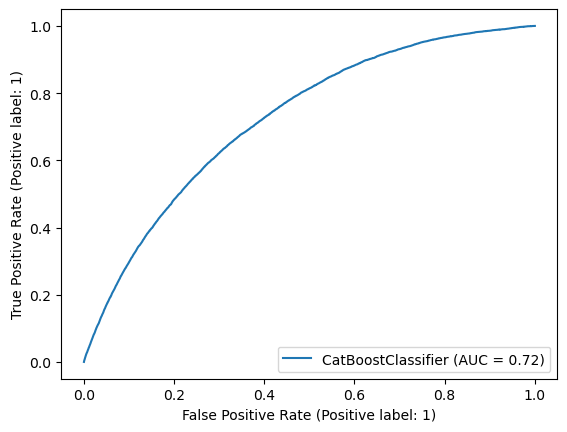

In [63]:
RocCurveDisplay.from_estimator(
    model, 
    X=X_test,
    y=y_test
)

In [64]:
joblib.dump(model, 'models/catboost_model.pkl')

['models/catboost_model.pkl']

In [65]:
model.feature_names_

['utm_source',
 'utm_medium',
 'utm_campaign',
 'utm_adcontent',
 'device_category',
 'device_brand',
 'device_screen_resolution',
 'device_browser',
 'geo_country',
 'geo_city',
 'from_social',
 'is_organic']

In [66]:
merged_data.loc[merged_data['is_target'] == 1]

,Unnamed: 0,utm_source,utm_medium,utm_campaign,utm_adcontent,device_category,device_brand,device_screen_resolution,device_browser,geo_country,geo_city,from_social,is_target,is_organic
212,540,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1920x1080,YaBrowser,Russia,Reutov,0,1,1
259,659,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,360x760,Android Webview,Russia,Saint Petersburg,0,1,1
317,805,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1366x768,YaBrowser,Russia,Elektrostal,0,1,1
355,881,bByPQxmDaMXgpHeypKSM,referral,LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1280x1024,YaBrowser,Russia,Moscow,0,1,1
495,1271,fDLlAcSmythWSCVMvqvL,(none),LTuZkdKfxRGVceoWkVyg,JNHcPlZPxEMWDnRiyoBf,mobile,Xiaomi,393x851,Chrome,Russia,Moscow,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1905356,238972,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,412x892,Samsung Internet,Russia,Moscow,0,1,0
1905357,238988,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,412x892,Samsung Internet,Russia,Moscow,0,1,0
1905358,238991,ZpYIoDJMcFzVoPFsHGJL,banner,gecBYcKZCPMcVYdSSzKP,JNHcPlZPxEMWDnRiyoBf,mobile,Samsung,412x892,Samsung Internet,Russia,Moscow,0,1,0
1905453,240078,hTjLvqNxGggkGnxSCaTm,tg,wpmatvDuiMutnvmNVPJo,JNHcPlZPxEMWDnRiyoBf,desktop,NaN,1280x720,Chrome,Russia,Moscow,0,1,0
